In [195]:
import warnings
warnings.simplefilter("ignore")

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
import shap

# 1. Load data

In [198]:
df = pd.read_csv("ds_salaries.csv")

In [199]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1524,2023,MI,FT,Data Analyst,80000,USD,80000,US,0,US,M
938,2023,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M
3248,2022,SE,FT,Data Engineer,181940,USD,181940,US,0,US,M
1154,2023,EX,FT,Data Engineer,239000,USD,239000,US,100,US,M
1683,2023,MI,FT,Machine Learning Engineer,219000,USD,219000,US,50,US,L


In [200]:
df.shape

(3755, 11)

# 2. Check data quality

data type

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


unique value

In [202]:
df.shape

(3755, 11)

In [203]:
for i in df.columns:
    print('Columns name: ', i)
    print('Unique value: ', df[i].unique())
    print('Count unique value: ', df[i].nunique())
    print('-'*10)

Columns name:  work_year
Unique value:  [2023 2022 2020 2021]
Count unique value:  4
----------
Columns name:  experience_level
Unique value:  ['SE' 'MI' 'EN' 'EX']
Count unique value:  4
----------
Columns name:  employment_type
Unique value:  ['FT' 'CT' 'FL' 'PT']
Count unique value:  4
----------
Columns name:  job_title
Unique value:  ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Da

missing value

In [204]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# 3. Exploratory data analysis (EDA)

list of columns by types

In [205]:
target_col = ['salary_in_usd']

In [206]:
num_col = ['remote_ratio']

In [207]:
cat_col = ['work_year','experience_level','employment_type','job_title','employee_residence','company_location','company_size']

target

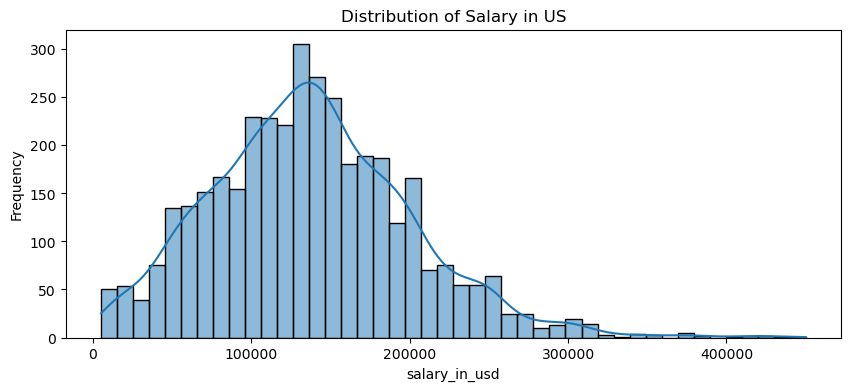

In [208]:
plt.figure(figsize=(10, 4))
sns.histplot(df['salary_in_usd'], kde=True)
plt.xlabel('salary_in_usd')
plt.ylabel('Frequency')
plt.title('Distribution of Salary in US')
plt.show()

numerical features

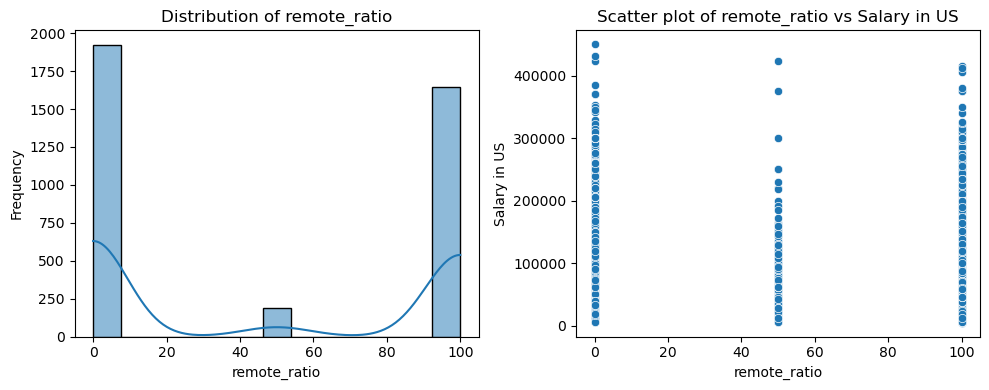

In [209]:
for column in num_col:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Left subplot - Distribution plot
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Distribution of {column}')
    
    # Right subplot - Scatter plot with 'salary in us'
    sns.scatterplot(data=df, x=column, y='salary_in_usd', ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Salary in US')
    axes[1].set_title(f'Scatter plot of {column} vs Salary in US')
    
    plt.tight_layout()
    plt.show()

categorical features

In [210]:
df[cat_col].describe(include='object')

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755
unique,4,4,93,78,72,3
top,SE,FT,Data Engineer,US,US,M
freq,2516,3718,1040,3004,3040,3153


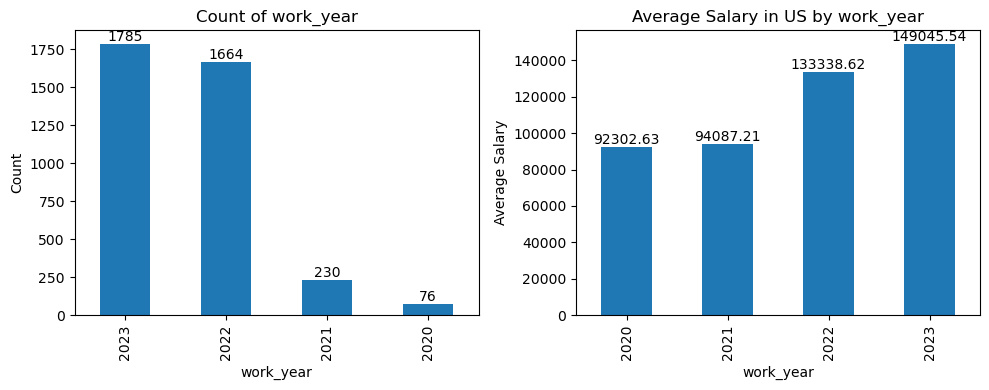

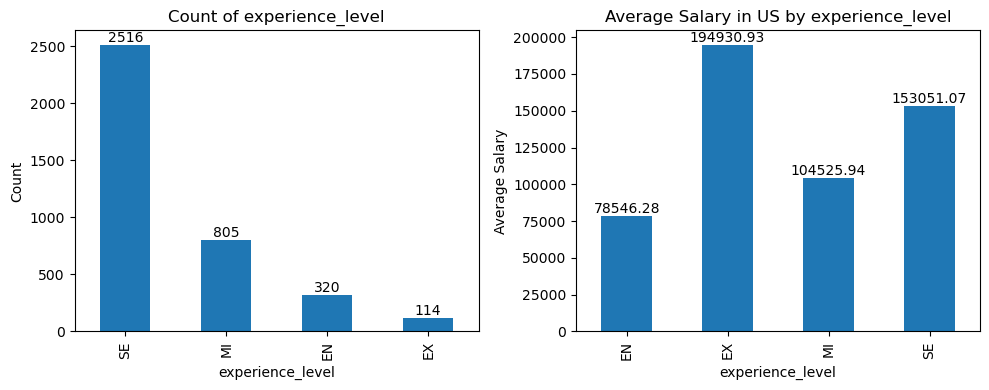

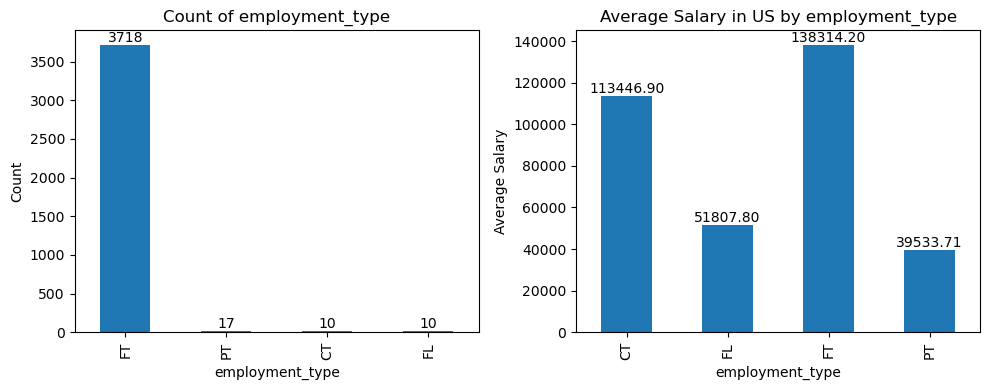

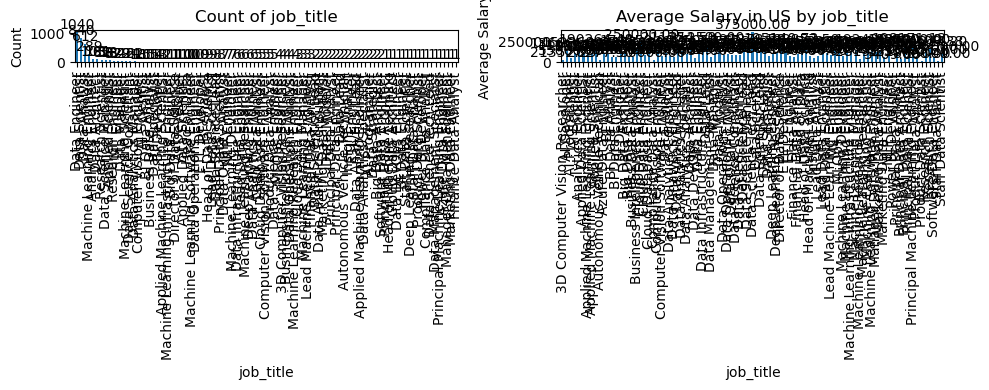

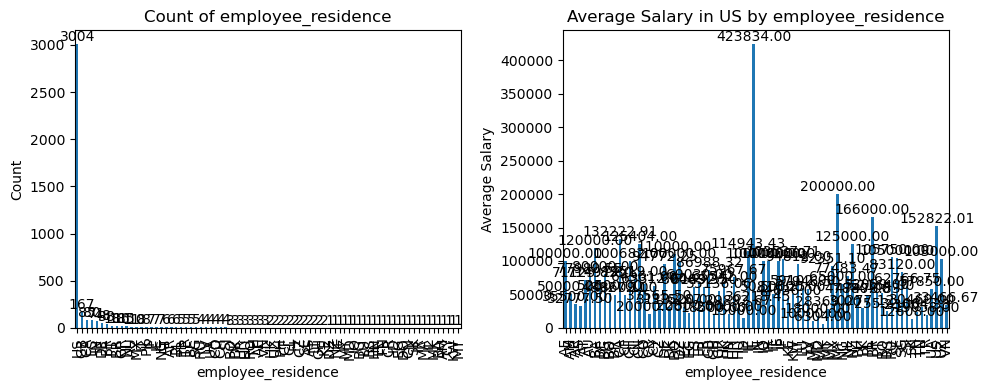

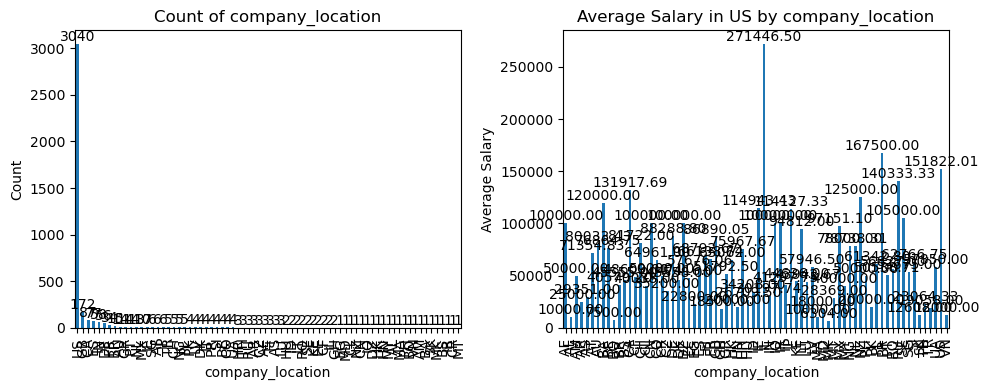

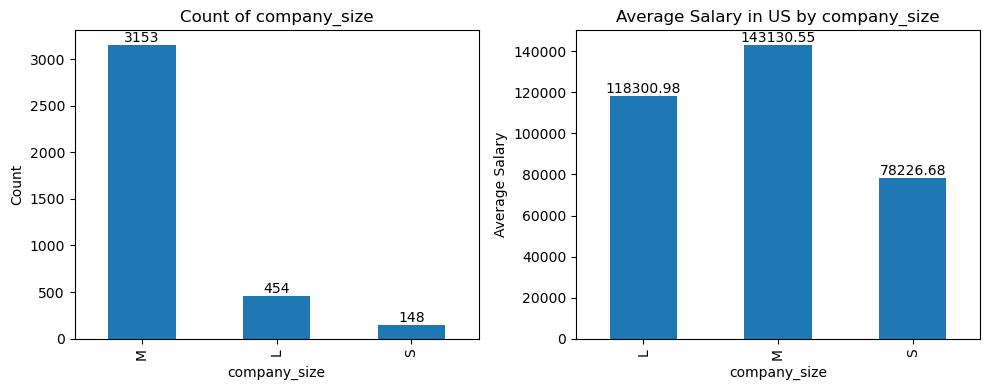

In [211]:
for column in cat_col:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Left subplot - Bar chart for counts
    category_counts = df[column].value_counts()
    total_count = len(df[column])
    ax = category_counts.plot(kind='bar', ax=axes[0])
    for i, count in enumerate(category_counts):
        ax.annotate(f'{count}', xy=(i, count), ha='center', va='bottom')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Count of {column}')
    
    # Right subplot - Bar chart for average salary
    avg_salary = df.groupby(column)['salary_in_usd'].mean()
    ax2 = avg_salary.plot(kind='bar', ax=axes[1])
    for i, avg in enumerate(avg_salary):
        ax2.annotate(f'{avg:.2f}', xy=(i, avg), ha='center', va='bottom')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Average Salary')
    axes[1].set_title(f'Average Salary in US by {column}')
    
    plt.tight_layout()
    plt.show()

# 4. Feature engineering

In [212]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [213]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

target

In [214]:
df.drop(columns=['salary'], inplace=True)

work year

In [215]:
df['work_year'] = df['work_year']-2021

In [216]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


experience level

In [217]:
# EN (Entry-level): 1
# MI (Mid-level): 2
# SE (Senior): 3
# EX (Expert): 4

In [218]:
exp_mapping = {'SE': 2, 'MI': 1, 'EN': 0, 'EX': 3}

In [219]:
df['experience_level'] = df['experience_level'].map(exp_mapping)

employment type

In [220]:
# FT: 3 (Highest stability, usually full-time permanent)
# CT: 2 (Contract work, usually stable but time-limited)
# FL: 1 (Freelance, less stability, more flexibility)
# PT: 0 (Part-time, less hours, often more flexibility)

In [221]:
employment_type_mapping = {'FT': 3, 'CT': 2, 'FL': 1, 'PT': 0}

In [222]:
df['employment_type'] = df['employment_type'].map(employment_type_mapping)

job title

In [223]:
def categorize_job_title(title):
    if title in [
        'Data Scientist', 'Applied Scientist', 'Principal Data Scientist', 'Data Science Manager',
        'Data Science Lead', 'Data Scientist Lead', 'Data Science Engineer', 'Data Science Consultant',
        'Director of Data Science', 'Head of Data Science', 'Data Science Tech Lead', 'Product Data Scientist',
        'Staff Data Scientist', 'Applied Data Scientist'
    ]:
        return 'Data Science'
    elif title in [
        'ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'AI Developer',
        'Machine Learning Scientist', 'AI Scientist', 'Machine Learning Researcher', 'Machine Learning Research Engineer',
        'Machine Learning Developer', 'Machine Learning Software Engineer', 'Principal Machine Learning Engineer',
        'Head of Machine Learning', 'Lead Machine Learning Engineer', 'Machine Learning Manager', 'AI Programmer'
    ]:
        return 'Machine Learning/AI'
    elif title in [
        'Data Analyst', 'Business Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst',
        'Financial Data Analyst', 'Data Analytics Manager', 'Marketing Data Analyst', 'Insight Analyst',
        'Data Operations Analyst', 'Product Data Analyst', 'Data Analytics Engineer', 'Data Analytics Consultant',
        'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'BI Analyst', 'BI Developer', 'BI Data Analyst',
        'Staff Data Analyst', 'Finance Data Analyst'
    ]:
        return 'Data Analysis'
    elif title in [
        'Data Engineer', 'Data Modeler', 'Data DevOps Engineer', 'Data Architect', 'Big Data Engineer',
        'ETL Engineer', 'Cloud Database Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer',
        'Data Operations Engineer', 'BI Data Engineer', 'Deep Learning Engineer', 'Big Data Architect',
        'Azure Data Engineer', 'Marketing Data Engineer', 'Lead Data Engineer', 'Principal Data Engineer',
        'Cloud Data Engineer', 'ETL Developer', 'Cloud Data Architect', 'Data Management Specialist', 'Data Specialist',
        'Analytics Engineer', 'Business Intelligence Engineer', 'MLOps Engineer', 'Machine Learning Infrastructure Engineer',
        'Data Strategist'
    ]:
        return 'Data Engineering'
    elif title in [
        'Research Engineer', 'Research Scientist', 'Deep Learning Researcher', '3D Computer Vision Researcher',
        'Applied Machine Learning Scientist', 'Autonomous Vehicle Technician', 'NLP Engineer',
        'Computer Vision Engineer', 'Computer Vision Software Engineer'
    ]:
        return 'Research and Development'
    elif title in [
        'Head of Data', 'Data Manager', 'Data Lead', 'Data Science Manager', 'Manager Data Management',
        'Lead Data Scientist', 'Head of Machine Learning', 'Principal Data Analyst', 'Principal Data Architect',
        'Lead Data Analyst'
    ]:
        return 'Leadership/Management'

In [224]:
df['job_category'] = df['job_title'].apply(categorize_job_title)

In [225]:
df['job_category'].unique()

array(['Data Science', 'Machine Learning/AI', 'Data Analysis',
       'Data Engineering', 'Research and Development',
       'Leadership/Management'], dtype=object)

In [226]:
df_dummies = pd.get_dummies(df['job_category']).astype(int)

In [227]:
df = pd.concat([df, df_dummies], axis=1)

In [228]:
df.drop(columns=['job_title','job_category'], inplace=True)

In [229]:
df.head()

,work_year,experience_level,employment_type,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Data Analysis,Data Engineering,Data Science,Leadership/Management,Machine Learning/AI,Research and Development
0,2,2,3,EUR,85847,ES,100,ES,L,0,0,1,0,0,0
1,2,1,2,USD,30000,US,100,US,S,0,0,0,0,1,0
2,2,1,2,USD,25500,US,100,US,S,0,0,0,0,1,0
3,2,2,3,USD,175000,CA,100,CA,M,0,0,1,0,0,0
4,2,2,3,USD,120000,CA,100,CA,M,0,0,1,0,0,0


In [230]:
***

SyntaxError: invalid syntax (2938429678.py, line 1)

In [ ]:
**

In [ ]:
# PaymentMethod (one hot)

In [ ]:
for payment_method in df['PaymentMethod'].unique():
    df['PaymentMethod_' + payment_method] = df['PaymentMethod'].apply(lambda x: 1 if x == payment_method else 0)
df = df.drop('PaymentMethod', axis=1)

In [ ]:
# Gender

In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [ ]:
# Partner

In [ ]:
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Dependents

In [ ]:
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# PhoneService

In [ ]:
df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# MultipleLines

In [ ]:
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# InternetService

In [ ]:
df['InternetService'] = df['InternetService'].apply(lambda x: 2 if x == 'Fiber optic' else 1 if x == 'DSL' else 0)

In [ ]:
# OnlineSecurity

In [ ]:
df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# OnlineBackup

In [ ]:
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# DeviceProtection

In [ ]:
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# TechSupport

In [ ]:
df['TechSupport'] = df['TechSupport'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# StreamingTV

In [ ]:
df['StreamingTV'] = df['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# StreamingMovies

In [ ]:
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Contract

In [ ]:
df['Contract'] = df['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else 1 if x == 'One year' else 2)

In [ ]:
# PaperlessBilling

In [ ]:
df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

fill na

In [ ]:
df.isna().sum()

In [ ]:
# TotalCharges

In [ ]:
median_tol_charges = df['TotalCharges'].median()

In [ ]:
median_tol_charges

In [ ]:
df['TotalCharges'].fillna(median_tol_charges, inplace=True)

In [ ]:
df.isna().sum()

drop unnecessary columns

In [ ]:
# drop customerID

In [ ]:
df.drop(columns = 'customerID', inplace = True)

correlation

In [ ]:
# check correlation

In [ ]:
corr = df.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, annot=True, ax=ax)

In [ ]:
corr_churn_table = corr['Churn'].sort_values(ascending=False)

In [ ]:
corr_churn_table

In [ ]:
corr_churn_abs_table = corr['Churn'].abs().sort_values(ascending=False)

In [ ]:
corr_churn_abs_table

# 5. Model

In [ ]:
# Only Class 0
# Only Class 1

# Normalized > SMOTE > RF (Random Search)
# Normalized > SMOTE > LightGBM (Random Search)
# Normalized > SMOTE > XGBoost (Random Search)

# Normalized > ADASYN > RF (Random Search)
# Normalized > ADASYN > LightGBM (Random Search)
# Normalized > ADASYN > XGBoost (Random Search)

# Normalized > RUS > RF (Random Search)
# Normalized > RUS > LightGBM (Random Search)
# Normalized > RUS > XGBoost (Random Search)

Step 1: Train/Test/Validation Split

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']
X_val = val_df.drop(columns=['Churn'])
y_val = val_df['Churn']
X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)
 
print(X_test.shape)
print(y_test.shape)

Step 2: Normalize Min-Max Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Step 3.1: predicts only 1

In [ ]:
dummy_all_churn = DummyClassifier(strategy='constant', constant=1)
dummy_all_churn.fit(X_train_scaled, y_train)

Step 3.2: predicts only 0

In [ ]:
dummy_all_not_churn = DummyClassifier(strategy='constant', constant=0)
dummy_all_not_churn.fit(X_train_scaled, y_train)

Step 3.3: Smote + RF

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_smote_random_search = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
rf_smote_random_search.fit(X_train_smote, y_train_smote)

In [ ]:
rf_smote_random_search.best_score_

In [ ]:
rf_smote = rf_smote_random_search.best_estimator_

Step 3.4: Smote + LGBM

In [ ]:
lgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
lgbm = LGBMClassifier(random_state=42)
lgbm_smote_random_search = RandomizedSearchCV(lgbm, param_distributions=lgbm_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
lgbm_smote_random_search.fit(X_train_smote, y_train_smote)

In [ ]:
lgbm_smote_random_search.best_score_

In [ ]:
lgbm_smote = lgbm_smote_random_search.best_estimator_

Step 3.5: Smote + XGB

In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb = XGBClassifier(random_state=42)
xgb_smote_random_search = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
xgb_smote_random_search.fit(X_train_smote, y_train_smote)

In [ ]:
xgb_smote_random_search.best_score_

In [ ]:
xgb_smote = xgb_smote_random_search.best_estimator_

Step 3.6: ADASYN + RF

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_adasyn_random_search = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
rf_adasyn_random_search.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
rf_adasyn_random_search.best_score_

In [ ]:
rf_adasyn = rf_adasyn_random_search.best_estimator_

Step 3.7: ADASYN + LGBM

In [ ]:
lgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
lgbm = LGBMClassifier(random_state=42)
lgbm_adasyn_random_search = RandomizedSearchCV(lgbm, param_distributions=lgbm_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
lgbm_adasyn_random_search.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
lgbm_adasyn_random_search.best_score_

In [ ]:
lgbm_adasyn = lgbm_adasyn_random_search.best_estimator_

Step 3.8: ADASYN + XGB

In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb = XGBClassifier(random_state=42)
xgb_adasyn_random_search = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
xgb_adasyn_random_search.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
xgb_adasyn_random_search.best_score_

In [ ]:
xgb_adasyn = xgb_adasyn_random_search.best_estimator_

Step 3.9: RUS + RF

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
rf_rus_random_search = RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
rf_rus_random_search.fit(X_train_rus, y_train_rus)

In [ ]:
rf_rus_random_search.best_score_

In [ ]:
rf_rus = rf_rus_random_search.best_estimator_

Step 3.10: RUS + LGBM

In [ ]:
lgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
lgbm_rus = LGBMClassifier(random_state=42)
lgbm_rus_random_search = RandomizedSearchCV(lgbm_rus, param_distributions=lgbm_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
lgbm_rus_random_search.fit(X_train_rus, y_train_rus)

In [ ]:
lgbm_rus_random_search.best_score_

In [ ]:
lgbm_rus = lgbm_rus_random_search.best_estimator_

Step 3.11: RUS + XGB

In [ ]:
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb_rus = XGBClassifier(random_state=42)
xgb_rus_random_search = RandomizedSearchCV(xgb_rus, param_distributions=xgb_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
xgb_rus_random_search.fit(X_train_rus, y_train_rus)

In [ ]:
xgb_rus_random_search.best_score_

In [ ]:
xgb_rus = xgb_rus_random_search.best_estimator_

# 6. Result (precision/recall/AUC-ROC)

In [ ]:
models = {
    'Dummy Model (All Churn)': dummy_all_churn,
    'Dummy Model (All Not Churn)': dummy_all_not_churn,
    'Random Forest (SMOTE)': rf_smote,
    'LightGBM (SMOTE)': lgbm_smote,
    'XGBoost (SMOTE)': xgb_smote,

    'Random Forest (ADASYN)': rf_adasyn,
    'LightGBM (ADASYN)': lgbm_adasyn,
    'XGBoost (ADASYN)': xgb_adasyn,

    'Random Forest (RUS)': rf_rus,
    'LightGBM (RUS)': lgbm_rus,
    'XGBoost (RUS)': xgb_rus
}

In [ ]:
summary_metrics = pd.DataFrame(columns=['Model', 'Observation', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'AUCROC'])

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    model_summary = pd.DataFrame({
        'Model': [model_name],
        'Observation': [len(y_test)],
        'TP': [tp],
        'TN': [tn],
        'FP': [fp],
        'FN': [fn],
        'Precision': [precision],
        'Recall': [recall],
        'AUCROC': [auc_roc]
    })

    summary_metrics = pd.concat([summary_metrics, model_summary], ignore_index=True)

In [ ]:
summary_metrics

# 7. Threshold tunning

In [ ]:
# Assume
# Cost of promotion = 100
# Cost of losing customer = 500 (5 times)

In [ ]:
# ref from https://github.com/stephenblount/Churn_Classification/blob/main/Final_Analysis/Churn_Analysis_Final.ipynb

In [ ]:
cost_promotion = 100
cost_loss = 500
savings_per_customer = 500

In [ ]:
thresholds = np.linspace(0, 1, 101)  # 101 thresholds from 0 to 1

In [ ]:
best_thresholds = {}
gains_val = {}
gains_test = {}

In [ ]:
for model_name, model in models.items():

    model_gains_val = []
    model_gains_test = []

    y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_pred_proba = y_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_pred_proba = y_pred_proba - 0.1

    model_gains = []
    for threshold in thresholds:
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_val, y_pred)
        costs = (cm[0, 1] * cost_promotion) + (cm[1, 0] * cost_loss)
        savings = cm[1, 1] * savings_per_customer
        gain = savings - costs
        model_gains.append(gain)

    best_threshold_idx = np.argmax(model_gains)
    best_threshold = thresholds[best_threshold_idx]
    
    best_thresholds[model_name] = (best_threshold, max(model_gains))
    gains_val[model_name] = model_gains
    
    y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_test_pred_proba = y_test_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_test_pred_proba = y_test_pred_proba - 0.1 

    y_test_pred = (y_test_pred_proba > best_threshold).astype(int)
    cm_test = confusion_matrix(y_test, y_test_pred)  
    costs_test = (cm_test[0, 1] * cost_promotion) + (cm_test[1, 0] * cost_loss)
    savings_test = cm_test[1, 1] * savings_per_customer   
    gain_test = savings_test - costs_test

    gains_test[model_name] = gain_test

In [ ]:
best_thresholds

In [ ]:
gains_test

In [ ]:
summary_thresholds = pd.DataFrame(columns=['Model', 'Best Threshold', 'Validation Gain', 'Test Gain'])

In [ ]:
for model_name, model_gains_val in gains_val.items():
    best_threshold, _ = best_thresholds[model_name]

    model_summary_thresholds = pd.DataFrame({
        'Model': [model_name],
        'Best Threshold': [best_threshold],
        'Validation Gain': [max(model_gains_val)],
        'Test Gain': [gains_test[model_name]]
    })

    summary_thresholds = pd.concat([summary_thresholds, model_summary_thresholds], ignore_index=True)

In [ ]:
summary_thresholds

# 8. Result (threshold/cost)

In [ ]:
summary_df = pd.merge(summary_metrics, summary_thresholds, on="Model", how="left")

In [ ]:
summary_df

In [ ]:
y_test.shape

In [ ]:
# rf_rus is the best model in term of gains

# 9. SHAP

In [ ]:
column_names = X_train.columns.tolist()

In [ ]:
explainer = shap.Explainer(lgbm_rus)
shap_values = explainer.shap_values(X_train_rus)

In [ ]:
explanation = shap.Explanation(values=shap_values[0], data=X_train_rus, feature_names=column_names)

In [ ]:
shap.plots.beeswarm(explanation)
plt.show()

In [ ]:
# top 5 impact features are 1. contract 2. tenue 3. monthlycharges 4. internetservince 5. Payment method (electronic check)